<a href="https://colab.research.google.com/github/Shrey-Viradiya/ML_DL/blob/master/Anime_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d soumikrakshit/anime-faces

100% 439M/441M [00:04<00:00, 115MB/s]
100% 441M/441M [00:04<00:00, 97.3MB/s]


In [3]:
!unzip anime-faces.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/data/55.png        
  inflating: data/data/550.png       
  inflating: data/data/5500.png      
  inflating: data/data/5501.png      
  inflating: data/data/5502.png      
  inflating: data/data/5503.png      
  inflating: data/data/5504.png      
  inflating: data/data/5505.png      
  inflating: data/data/5506.png      
  inflating: data/data/5507.png      
  inflating: data/data/5508.png      
  inflating: data/data/5509.png      
  inflating: data/data/551.png       
  inflating: data/data/5510.png      
  inflating: data/data/5511.png      
  inflating: data/data/5512.png      
  inflating: data/data/5513.png      
  inflating: data/data/5514.png      
  inflating: data/data/5515.png      
  inflating: data/data/5516.png      
  inflating: data/data/5517.png      
  inflating: data/data/5518.png      
  inflating: data/data/5519.png      
  inflating: data/data/552.png       
  inflating: data/data/5520.png      

# Anime GAN

In [4]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from time import time

In [8]:
path_dataset = './data/'
image_dataset = './data/data/'

In [9]:
images = os.listdir(image_dataset)

Text(0.5, 1.0, '21487.png')

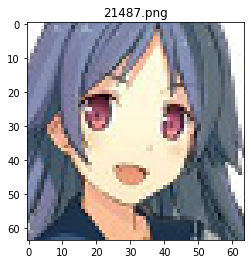

In [10]:
name1 = images[np.random.randint(0,len(images))]
path1 = image_dataset + name1
plt.imshow(Image.open(path1))
plt.title(name1)

In [36]:
total_images = len(images)
batch_size = 128

In [50]:
data_gen = keras.preprocessing.image.ImageDataGenerator(rescale= 1./255)

In [51]:
faces = data_gen.flow_from_directory(path_dataset, target_size = (56,56), class_mode=None, batch_size = batch_size)

Found 21551 images belonging to 1 classes.


In [52]:
faces.image_shape

(56, 56, 3)

In [62]:
codings_size = 100

generator = keras.models.Sequential([
    keras.layers.Dense(7*7*64, input_shape = [codings_size]),
    keras.layers.Reshape([7,7,64]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(32, kernel_size = 5, strides = 2,
                                padding = 'same', activation = 'selu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(16, kernel_size = 5, strides = 2,
                                padding = 'same', activation = 'selu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(3, kernel_size = 5, strides = 2,
                                padding = 'same', activation = 'tanh')
])

discriminator = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size =5, strides = 2, padding = 'same',
                       activation = keras.layers.LeakyReLU(0.2),
                       input_shape = [56,56,3]),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(128, kernel_size=5, strides = 2, padding='same',
                       activation = keras.layers.LeakyReLU(0.2)),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation = 'sigmoid')
])

gan = keras.models.Sequential([generator, discriminator])

In [63]:
discriminator.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop')
discriminator.trainable = False
gan.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop')

In [64]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=1):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print("Epoch {}/{}".format(epoch + 1, n_epochs))
        start = time()
        i = 0
        total_et = total_images//batch_size
        while i < total_et:
            print(i)
            X_batch = dataset.next()
            # phase 1 - training the discriminator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)
            # phase 2 - training the generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)
            i+=1
        print(f"Duration {time() - start} s")

In [65]:
train_gan(gan, faces, batch_size, codings_size,n_epochs = 20)

Epoch 1/20
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
Duration 468.7332429885864 s
Epoch 2/20
0


ValueError: ignored

In [57]:
new_faces = generator(tf.random.normal(shape=[batch_size, codings_size]))

In [58]:
new_faces.shape

TensorShape([128, 56, 56, 3])

In [59]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

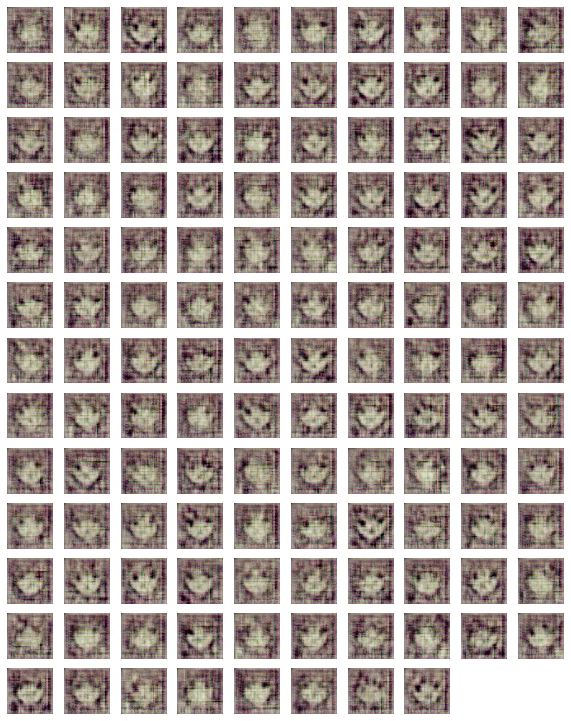

In [60]:
plot_multiple_images(new_faces, n_cols=10)